### [1] 데이터 셋 다운로드 - curl 명령어 이용

In [2]:
!curl https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt > C://Users/msi/Desktop/공부/자연어처리/Kaggle/Day2/naver_movie/dataset/rating.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  9 18.6M    9 1767k    0     0   883k      0  0:00:21  0:00:02  0:00:19  869k
 25 18.6M   25 4903k    0     0  1634k      0  0:00:11  0:00:03  0:00:08 1609k
 38 18.6M   38 7351k    0     0  1837k      0  0:00:10  0:00:04  0:00:06 1823k
 63 18.6M   63 11.7M    0     0  2401k      0  0:00:07  0:00:05  0:00:02 2401k
 77 18.6M   77 14.4M    0     0  2459k      0  0:00:07  0:00:06  0:00:01 3137k
 95 18.6M   95 17.7M    0     0  2595k      0  0:00:07  0:00:07 --:--:-- 3280k
100 18.6M  100 18.6M    0     0  2722k      0  0:00:07  0:00:07 --:--:-- 3342k


In [3]:
!curl https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt > C://Users/msi/Desktop/공부/자연어처리/Kaggle/Day2/naver_movie/dataset/ratings_train.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 14 13.9M   14 2135k    0     0  2135k      0  0:00:06  0:00:01  0:00:05 1871k
 55 13.9M   55 7943k    0     0  3971k      0  0:00:03  0:00:02  0:00:01 3710k
 87 13.9M   87 12.1M    0     0  4151k      0  0:00:03  0:00:03 --:--:-- 3965k
100 13.9M  100 13.9M    0     0  4761k      0  0:00:03  0:00:03 --:--:-- 3841k


In [4]:
!curl https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt > C://Users/msi/Desktop/공부/자연어처리/Kaggle/Day2/naver_movie/dataset/ratings_test.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 23 4778k   23 1141k    0     0  1141k      0  0:00:04  0:00:01  0:00:03  936k
 85 4778k   85 4072k    0     0  2036k      0  0:00:02  0:00:02 --:--:-- 1835k
100 4778k  100 4778k    0     0  2389k      0  0:00:02  0:00:02 --:--:-- 2038k


### [2] 라이브러리 선언

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### [3] 데이터 불러오기

In [3]:
BASIC_PATH = "/dataset"

In [4]:
TOTAL_RATINGS = '/rating.txt'
TRAIN_RATINGS = '/ratings_train.txt'
TEST_RATINGS = '/ratings_test.txt'

In [10]:
print("파일 크기 : ")
for file in os.listdir(BASIC_PATH):
    if 'txt' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(BASIC_PATH+"/"+file) / 100000, 2)) + 'KB')

파일 크기 : 
rating.txt                    195.15KB
ratings_test.txt              48.93KB
ratings_train.txt             146.29KB


In [11]:
train_data = pd.read_csv(
    BASIC_PATH + TRAIN_RATINGS, header = 0, delimiter = '\t', quoting=3
)

In [12]:
train_data.head(5)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


### [4] 데이터 개수

In [13]:
print("전체 학습데이터 개수 : {}".format(len(train_data)))

전체 학습데이터 개수 : 150000


### [5] 각 리뷰의 문자 길이 분포

In [14]:
train_length = train_data['document'].apply(len)
train_length.head()

TypeError: object of type 'float' has no len()

* len이 float이면 그 값은 nan임
* nan 처리 해야 함 -> pandas의 dropna 사용!

In [15]:
train_data[train_data['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [16]:
train_data[train_data['label'].isnull()]

,id,document,label


In [17]:
train_data[train_data['id'].isnull()]

,id,document,label


In [18]:
train_data = train_data.dropna(axis=0) # 결측치가 있는 행 모두 삭제

In [19]:
train_data[train_data['document'].isnull()]

,id,document,label


In [20]:
train_length = train_data['document'].apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

Text(0, 0.5, 'number of review')

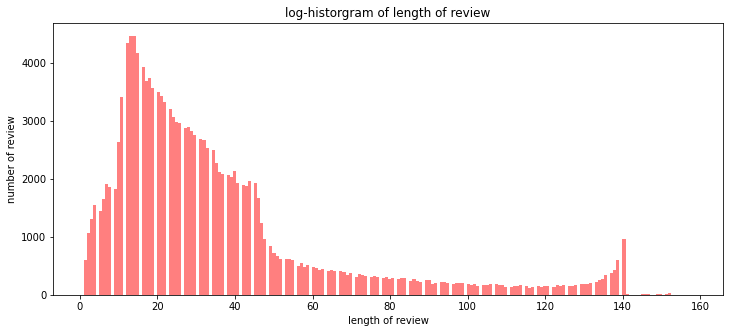

In [22]:
plt.figure(figsize=(12,5)) # figsize : (가로, 세로), 그래프 이미지 사이즈 선언

# 히스토그램 선언
	# bins(히스토그램 값들에 대한 버켓 범위)
	# range(x축 범위), alpha(그래프 색상 투명도), color(그래프 색상)
	# label(그래프에 대한 라벨)
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')

plt.title('log-historgram of length of review')
plt.xlabel('length of review')
plt.ylabel('number of review')

### [6] 긍정 부정 데이터 분포

c:\users\msi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

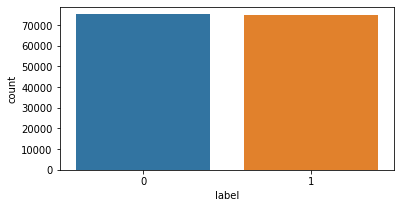

In [15]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['label'])

In [16]:
print("긍정 리뷰 개수 : {}".format(train_data['label'].value_counts()[1]))
# 긍정 : 74825
print("부정 리뷰 개수 : {}".format(train_data['label'].value_counts()[0]))
# 부정 : 75170

긍정 리뷰 개수 : 74825
부정 리뷰 개수 : 75170


### [6] 각 리뷰의 단어 개수 분포

c:\users\msi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


Text(0, 0.5, 'number of reviews')

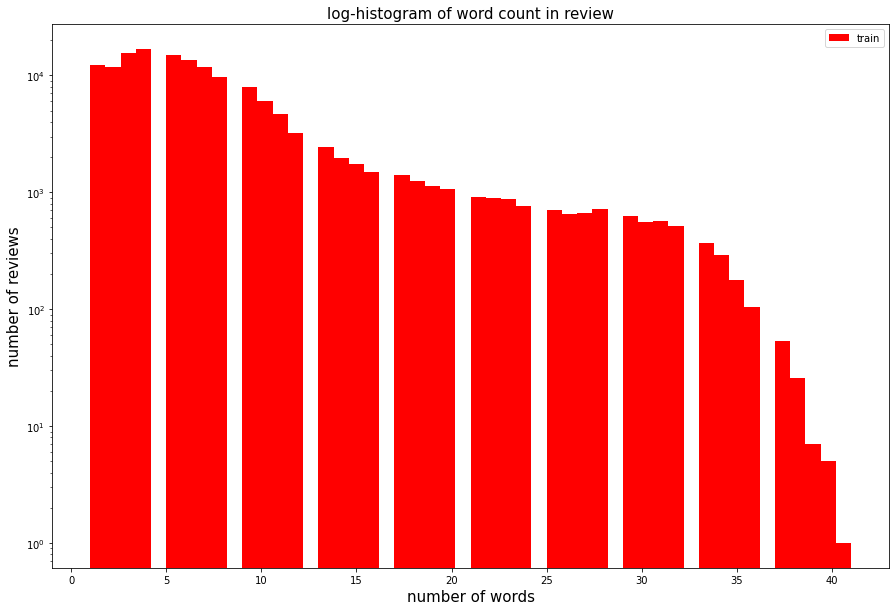

In [24]:
train_word_counts = train_data['document'].apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('log-histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('number of words', fontsize=15)
plt.ylabel('number of reviews', fontsize=15)

### [7] 특수문자 및 대문자, 소문자 비율

In [26]:
qmarks = np.mean(train_data['document'].apply(lambda x: '?' in x))
fullstop = np.mean(train_data['document'].apply(lambda x: '.' in x))
capital_first = np.mean(train_data['document'].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data['document'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_data['document'].apply(lambda x: max([y.isdigit() for y in x])))


print("물음표 있는 질문 : {:.2f}%".format(qmarks * 100))
print("마침표 있는 질문 : {:.2f}%".format(fullstop * 100))
print("첫 글자가 대문자 인 질문 : {:.2f}%".format(capital_first * 100))
print("대문자가 있는 질문 : {:.2f}%".format(capitals * 100))
print("숫자가 있는 질문 : {:.2f}%".format(numbers * 100))

물음표 있는 질문 : 8.25%
마침표 있는 질문 : 51.77%
첫 글자가 대문자 인 질문 : 0.96%
대문자가 있는 질문 : 3.75%
숫자가 있는 질문 : 13.62%
